In [11]:
import pandas as pd
import numpy as np

In [173]:
df_train = pd.read_csv('data/FD003_df_train.csv', index_col=0) 
def add_rul(g):
    g['RUL'] = max(g['time_in_cycles']) - g['time_in_cycles']
    return g

df_train = df_train.groupby('engine_no').apply(add_rul).dropna(axis=1)
X_train = df_train.drop('RUL', axis=1)

y_train = df_train[['engine_no','RUL']]


In [174]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
#x_test_scaled = scaler.transform(X_test)


StandardScaler()

(array([21., 29., 16., 12.,  8.,  4.,  3.,  2.,  2.,  3.]),
 array([145., 183., 221., 259., 297., 335., 373., 411., 449., 487., 525.]),
 <BarContainer object of 10 artists>)

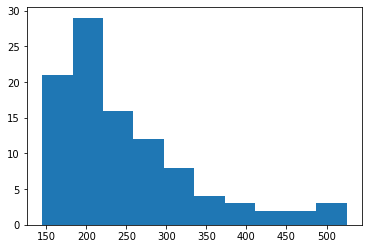

In [175]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

final = []
for i in range(1,101):
    globals()[f"eng_{i}"] = scaler.transform(pd.DataFrame(X_train[X_train['engine_no'] == i]))
    final.append(globals()[f"eng_{i}"])


plt.hist([len(l) for l in final])

In [176]:
maxlen = 300

X_pad = pad_sequences(final, maxlen=maxlen, padding='post', value=100)

In [267]:
final_y = []
for i in range(1,101):
    globals()[f"eng_y_{i}"] = np.array(y_train[X_train['engine_no'] == i].drop('engine_no', axis=1))
    final_y.append(globals()[f"eng_y_{i}"])

final_y_bis
for i in range(100):
    a = []
    for j in range(len(final_y[i])):
        a.append(final_y[i][j][0])
    final_y_bis[i].append(a)

In [268]:
from tensorflow.keras import layers, Sequential

model = Sequential()
model.add(layers.Masking(mask_value=100, input_shape=(100,26)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_6 (Masking)          (None, 100, 26)           0         
_________________________________________________________________
dense_9 (Dense)              (None, 100, 64)           1728      
_________________________________________________________________
dense_10 (Dense)             (None, 100, 8)            520       
_________________________________________________________________
dense_11 (Dense)             (None, 100, 1)            9         
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [269]:
model.fit(X_pad, y_pad, verbose=1, epochs=10, batch_size=16)

ValueError: Data cardinality is ambiguous:
  x sizes: 100
  y sizes: 500
Make sure all arrays contain the same number of samples.

In [206]:
len(X_pad), len(final_y)

(100, 100)

In [207]:
final_y

[array([[258],
        [257],
        [256],
        [255],
        [254],
        [253],
        [252],
        [251],
        [250],
        [249],
        [248],
        [247],
        [246],
        [245],
        [244],
        [243],
        [242],
        [241],
        [240],
        [239],
        [238],
        [237],
        [236],
        [235],
        [234],
        [233],
        [232],
        [231],
        [230],
        [229],
        [228],
        [227],
        [226],
        [225],
        [224],
        [223],
        [222],
        [221],
        [220],
        [219],
        [218],
        [217],
        [216],
        [215],
        [214],
        [213],
        [212],
        [211],
        [210],
        [209],
        [208],
        [207],
        [206],
        [205],
        [204],
        [203],
        [202],
        [201],
        [200],
        [199],
        [198],
        [197],
        [196],
        [195],
        [194],
        [193],
        [1